In [1]:
# Import Data
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d swetashetye/mercedesbenz-greener-manufacturing

  0% 0.00/564k [00:00<?, ?B/s]
100% 564k/564k [00:00<00:00, 29.7MB/s]


In [4]:
import zipfile

with zipfile.ZipFile('/content/mercedesbenz-greener-manufacturing.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/mercedesbenz-greener-manufacturing')

# CLEAN

In [5]:
import pandas as pd
import numpy as np
import missingno as msno

In [6]:
df = pd.read_csv('/content/mercedesbenz-greener-manufacturing/train.csv',low_memory=False)

In [7]:
df.head(2)

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(4209, 378)

In [10]:
# Loop to go through each feature then store features name with 0 variance in list "train_name"

train_data=np.var(df, axis=0)

train_name=[]
for i in train_data.iteritems():
    if(i[1]==0):
        train_name.append(i[0])
        #print(i)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3713: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
<ipython-input-10-0e4d36e94a7f>:6: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i in train_data.iteritems():


In [11]:
train_name

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [12]:
df.drop(train_name,axis=1, inplace=True)

In [13]:
print(df.shape)

(4209, 366)


In [14]:
# Calculate the percentage of missing values in df_read
percentage_missing = df.isnull().sum() / len(df) * 100

# Create a new DataFrame with columns from df and index set to None
new_df = pd.DataFrame(columns=df.columns, index=None)
pd.set_option('display.max_columns', None)

# Creating new Percentage index
new_df.loc['Percentage'] = percentage_missing.values
new_df

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64,X65,X66,X67,X68,X69,X70,X71,X73,X74,X75,X76,X77,X78,X79,X80,X81,X82,X83,X84,X85,X86,X87,X88,X89,X90,X91,X92,X94,X95,X96,X97,X98,X99,X100,X101,X102,X103,X104,X105,X106,X108,X109,X110,X111,X112,X113,X114,X115,X116,X117,X118,X119,X120,X122,X123,X124,X125,X126,X127,X128,X129,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139,X140,X141,X142,X143,X144,X145,X146,X147,X148,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,X179,X180,X181,X182,X183,X184,X185,X186,X187,X189,X190,X191,X192,X194,X195,X196,X197,X198,X199,X200,X201,X202,X203,X204,X205,X206,X207,X208,X209,X210,X211,X212,X213,X214,X215,X216,X217,X218,X219,X220,X221,X222,X223,X224,X225,X226,X227,X228,X229,X230,X231,X232,X234,X236,X237,X238,X239,X240,X241,X242,X243,X244,X245,X246,X247,X248,X249,X250,X251,X252,X253,X254,X255,X256,X257,X258,X259,X260,X261,X262,X263,X264,X265,X266,X267,X269,X270,X271,X272,X273,X274,X275,X276,X277,X278,X279,X280,X281,X282,X283,X284,X285,X286,X287,X288,X291,X292,X294,X295,X296,X298,X299,X300,X301,X302,X304,X305,X306,X307,X308,X309,X310,X311,X312,X313,X314,X315,X316,X317,X318,X319,X320,X321,X322,X323,X324,X325,X326,X327,X328,X329,X331,X332,X333,X334,X335,X336,X337,X338,X339,X340,X341,X342,X343,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# Keep features with less than 20% missing values
features_to_keep = df.columns[ (df.isnull().sum()/len(df))*100 <20 ].tolist()

print('Features at start:',len(df.columns))
print('Features after filtering:',len(features_to_keep))

Features at start: 366
Features after filtering: 366


In [16]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature,'---',df[feature].isnull().sum(),'Missing values --- type:',df[feature].dtype)

In [17]:
df = df.drop_duplicates()

# PRE

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

In [19]:
df_model = df.copy()

del df_model['ID']

Text(0.5, 1.0, 'Data distribution of the target feature')

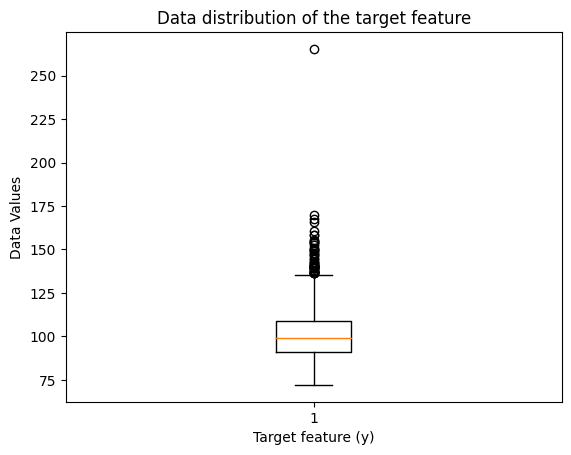

In [20]:
from matplotlib import pyplot as plt

plt.boxplot(df_model['y'])
plt.xlabel('Target feature (y)')
plt.ylabel('Data Values')
plt.title('Data distribution of the target feature')

In [21]:
df_model['target'] = ""

for i in range(len(df_model['y'])):
  if df_model['y'].iloc[i]>=100.00:
    df_model['target'].iloc[i] = "LongTime"
  else:
    df_model['target'].iloc[i] = "ShortTime"

<ipython-input-21-262b701e2f43>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['target'].iloc[i] = "LongTime"
<ipython-input-21-262b701e2f43>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['target'].iloc[i] = "ShortTime"


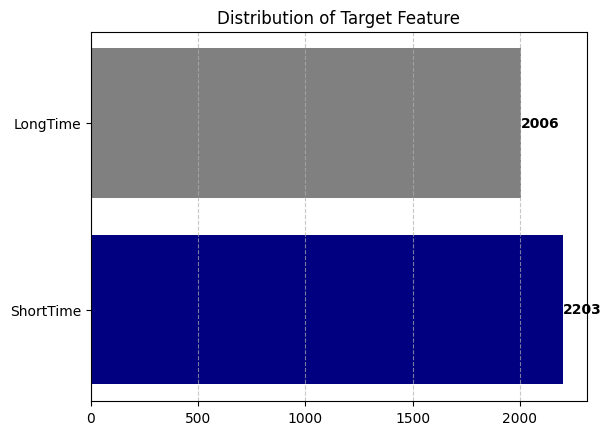

In [22]:
# Assuming you have a DataFrame 'df' with the 'target' column

# First, you might want to group the data by the 'target' column and count occurrences
target_counts = df_model['target'].value_counts()

# Extract labels and corresponding counts
labels = target_counts.index.tolist()
counts = target_counts.values.tolist()

# Define custom colors for the bars
colors = ['#000080', '#808080', '#4878d0', '#5e5e5e', '#92c5de', '#a4a4a4']

# Set up the figure and axis
fig, ax = plt.subplots()

# Plot the horizontal bar chart with custom colors
ax.barh(labels, counts, color=colors)

# Add counts as text labels on the bars
for i, count in enumerate(counts):
    ax.text(count, i, str(count), ha='left', va='center', color='black', fontweight='bold')

# Add a title to the chart
ax.set_title('Distribution of Target Feature')

# Show grid lines on the y-axis for better readability
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Show the horizontal bar plot
plt.show()

In [23]:
categorical_features = [features for features in df_model.columns if df_model[features].dtype == "object"]
numerical_features = [features for features in df_model.columns if features not in categorical_features]

print('Categorical Features:',categorical_features)
print('Numerical Features:',numerical_features)

Categorical Features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'target']
Numerical Features: ['y', 'X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X1

In [24]:
df_model[['y','target']].head(4)

,y,target
0,130.81,LongTime
1,88.53,ShortTime
2,76.26,ShortTime
3,80.62,ShortTime


In [25]:
del df_model['y']

In [26]:
X = df_model.drop(['target'],axis=1)
y = df_model['target']

In [27]:
y.value_counts()

ShortTime    2203
LongTime     2006
Name: target, dtype: int64

In [28]:
categorical_features.remove("target")

In [29]:
encoder = LabelEncoder()

for feature in X[categorical_features]:
  X[feature] = encoder.fit_transform(X[feature])

y = encoder.fit_transform(y)

In [30]:
X.shape,y.shape

((4209, 364), (4209,))

# MODELS

In [31]:
#TRAIN VAL TEST SPLIT

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y,random_state=42)
#X_val,X_test,y_val,y_test=train_test_split(X_,y_,test_size=0.5,shuffle=True,stratify=y_,random_state=42)


print("X_train.shape", X_train.shape, "y_train.shape", y_train.shape)
#print("X_val.shape", X_val.shape, "y_val.shape", y_val.shape)
print("X_test.shape", X_test.shape, "y_test.shape", y_test.shape)

X_train.shape (3367, 364) y_train.shape (3367,)
X_test.shape (842, 364) y_test.shape (842,)


## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

train_acc_hist_knn= []
cv_acc_hist_knn = []
test_acc_hist_knn = []

for i in range (1,30):
  knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors= i)
  knn_model.fit(X_train,y_train)

  y_pred_train_knn = knn_model.predict(X_train)
  #y_pred_val_knn = knn_model.predict(X_val)
  y_pred_test_knn = knn_model.predict(X_test)


  print('------- {} Neighbors --------'.format(i))
  print('F1 on Train: ', f1_score(y_train,y_pred_train_knn,average='macro'))
  print('F1 on Test: ', f1_score(y_test,y_pred_test_knn,average='macro'))
  print('Train Acc:',accuracy_score(y_train,y_pred_train_knn))
  print('Test Acc:',accuracy_score(y_test,y_pred_test_knn))


  train_acc_hist_knn.append(accuracy_score(y_train,y_pred_train_knn))
  #cv_acc_hist_knn.append(accuracy_score(y_val,y_pred_val_knn))
  test_acc_hist_knn.append(accuracy_score(y_test,y_pred_test_knn))



------- 1 Neighbors --------
F1 on Train:  0.9919600109842439
F1 on Test:  0.7728512449806004
Train Acc: 0.991980991980992
Test Acc: 0.7731591448931117
------- 2 Neighbors --------
F1 on Train:  0.8996550961465588
F1 on Test:  0.7416825743114263
Train Acc: 0.8999108999108999
Test Acc: 0.7434679334916865
------- 3 Neighbors --------
F1 on Train:  0.8934384570274321
F1 on Test:  0.7904524886877827
Train Acc: 0.893970893970894
Test Acc: 0.7909738717339667
------- 4 Neighbors --------
F1 on Train:  0.8782040830442989
F1 on Test:  0.789783554668491
Train Acc: 0.8782298782298782
Test Acc: 0.7897862232779097
------- 5 Neighbors --------
F1 on Train:  0.8798952013237729
F1 on Test:  0.8029347725870396
Train Acc: 0.8806058806058806
Test Acc: 0.8040380047505938
------- 6 Neighbors --------
F1 on Train:  0.8676831842756598
F1 on Test:  0.7992236916551791
Train Acc: 0.8678348678348679
Test Acc: 0.7992874109263658
------- 7 Neighbors --------
F1 on Train:  0.8656029863519373
F1 on Test:  0.80996060

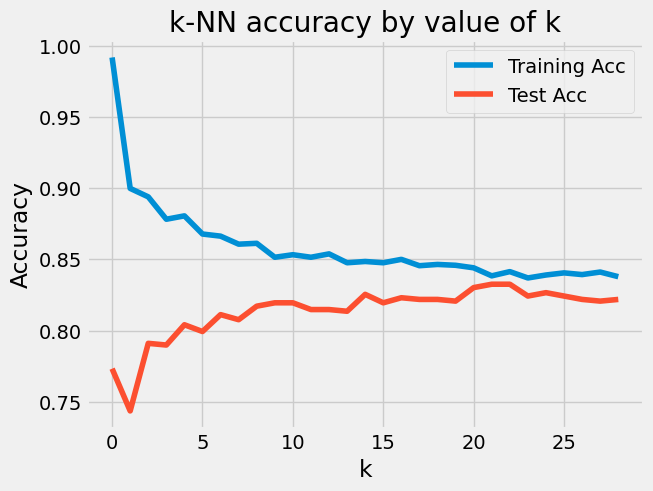

In [33]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

plt.plot(range(len(train_acc_hist_knn)),train_acc_hist_knn,label='Training Acc')
#plt.plot(range(len(cv_acc_hist_knn)),cv_acc_hist_knn,label='Validation Acc')
plt.plot(range(len(test_acc_hist_knn)),test_acc_hist_knn,label='Test Acc')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('k-NN accuracy by value of k')


plt.show()

In [37]:
knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors= 22)
knn_model.fit(X_train,y_train)

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

print('----------Best model----------------')
print('Acc on Train: ', accuracy_score(y_train,y_pred_train_knn))
print('Acc on Test: ', accuracy_score(y_test,y_pred_test_knn))

----------Best model----------------
Acc on Train:  0.8384318384318384
Acc on Test:  0.832541567695962


In [39]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_test_knn,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_test_knn)
print(report)

Confusion Matrix: [[319  82]
 [ 59 382]]
---------------
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       401
           1       0.82      0.87      0.84       441

    accuracy                           0.83       842
   macro avg       0.83      0.83      0.83       842
weighted avg       0.83      0.83      0.83       842



[Text(0.5, 4.183333333333314, 'Predictions'),
 Text(21.78333333333333, 0.5, 'Actual values')]

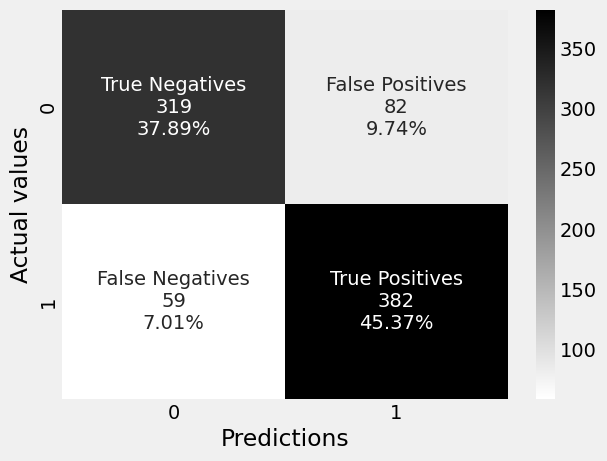

In [40]:
import seaborn as sns

group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten() / np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='binary')
ax.set(xlabel="Predictions",ylabel="Actual values")

# DFO

## KNN

In [41]:
import numpy as np

# FITNESS FUNCTION (SPHERE FUNCTION)
# FITNESS FUNCTION TO CALCULATE THE ACCURACY OF SELECTED FEW FEATURE BASED ON THE VECTOR X

def f(x):

  # GET THE SUBSET OF FEATURE BASED ON THE FLY VECTOR VALUES (TAKE FEATURES IF VALUE>=0.5)
  features_list = []

  for i in range(len(x)):
    if x[i]>=0.5:
      features_list.append(X.columns[i])

  X_dfo = X.copy()
  X_dfo = X_dfo.loc[:, features_list]

  y_dfo = y.copy()


  # TRAIN VAL TEST SPLIT
  X_train,X_test,y_train,y_test=train_test_split(X_dfo,y_dfo,test_size=0.2,shuffle=True,stratify=y,random_state=42)




  #########################   KNN

  from sklearn.neighbors import KNeighborsClassifier
  knn_model = KNeighborsClassifier(n_neighbors= 22)
  knn_model.fit(X_train,y_train)

  y_pred_test_knn = knn_model.predict(X_test)

  test_acc = accuracy_score(y_test,y_pred_test_knn)

  return test_acc


N = 50					# POPULATION SIZE
D = X.shape[1]					# DIMENSIONALITY
delta = 0.0001			# DISTURBANCE THRESHOLD
maxIterations = 50	# ITERATIONS ALLOWED
lowerB = [0]*D		# LOWER BOUND (IN ALL DIMENSIONS)
upperB = [1]*D		# UPPER BOUND (IN ALL DIMENSIONS)

historyy = []
feature_history = []



# INITIALISATION PHASE
XX = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

# INITIALISE FLIES WITHIN BOUNDS
for i in range(N):
	for d in range(D):
		XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

# MAIN DFO LOOP
for itr in range (maxIterations):
	for i in range(N): # EVALUATION
		fitness[i] = f(XX[i,])
	s = np.argmax(fitness) # FIND BEST FLY

	#if (itr%10 == 0): # PRINT BEST FLY EVERY 10 ITERATIONS
	print ("Iteration:", itr, "\tBest fly index:", s,
			   "\tFitness value (Test F1 - KNN):", fitness[s])

	historyy.append(fitness[s])

  # Condition for counting elements between 0 and 1 (inclusive) that are greater than 0.5
	condition = lambda x: 0.5 <= x <= 1

	# Using list comprehension to count elements that satisfy the condition
	count = len([element for element in XX[s,] if condition(element)])

	feature_history.append(count)



	# TAKE EACH FLY INDIVIDUALLY
	for i in range(N):
		if i == s: continue # ELITIST STRATEGY

		# FIND BEST NEIGHBOUR
		left = (i-1)%N
		right = (i+1)%N
		bNeighbour = right if fitness[right]>fitness[left] else left

		for d in range(D): # UPDATE EACH DIMENSION SEPARATELY
			if (np.random.rand() < delta):
				XX[i,d] = np.random.uniform(lowerB[d], upperB[d])
				continue;

			u = np.random.rand()
			XX[i,d] = XX[bNeighbour,d] + u*(XX[s,d] - XX[i,d])

			# OUT OF BOUND CONTROL
			if XX[i,d] < lowerB[d] or XX[i,d] > upperB[d]:
				XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

for i in range(N):
	fitness[i] = f(XX[i,]) # EVALUATION
s = np.argmax(fitness) # FIND BEST FLY

print("\nFinal best fitness:\t", fitness[s])
print("\nBest fly position:\n",  XX[s,])

Iteration: 0 	Best fly index: 1 	Fitness value (Test F1 - KNN): 0.8254156769596199
Iteration: 1 	Best fly index: 18 	Fitness value (Test F1 - KNN): 0.8432304038004751
Iteration: 2 	Best fly index: 18 	Fitness value (Test F1 - KNN): 0.8432304038004751
Iteration: 3 	Best fly index: 17 	Fitness value (Test F1 - KNN): 0.8467933491686461
Iteration: 4 	Best fly index: 23 	Fitness value (Test F1 - KNN): 0.8527315914489311
Iteration: 5 	Best fly index: 22 	Fitness value (Test F1 - KNN): 0.8551068883610451
Iteration: 6 	Best fly index: 22 	Fitness value (Test F1 - KNN): 0.8551068883610451
Iteration: 7 	Best fly index: 22 	Fitness value (Test F1 - KNN): 0.8551068883610451
Iteration: 8 	Best fly index: 22 	Fitness value (Test F1 - KNN): 0.8551068883610451
Iteration: 9 	Best fly index: 22 	Fitness value (Test F1 - KNN): 0.8551068883610451
Iteration: 10 	Best fly index: 22 	Fitness value (Test F1 - KNN): 0.8551068883610451
Iteration: 11 	Best fly index: 2 	Fitness value (Test F1 - KNN): 0.855106888

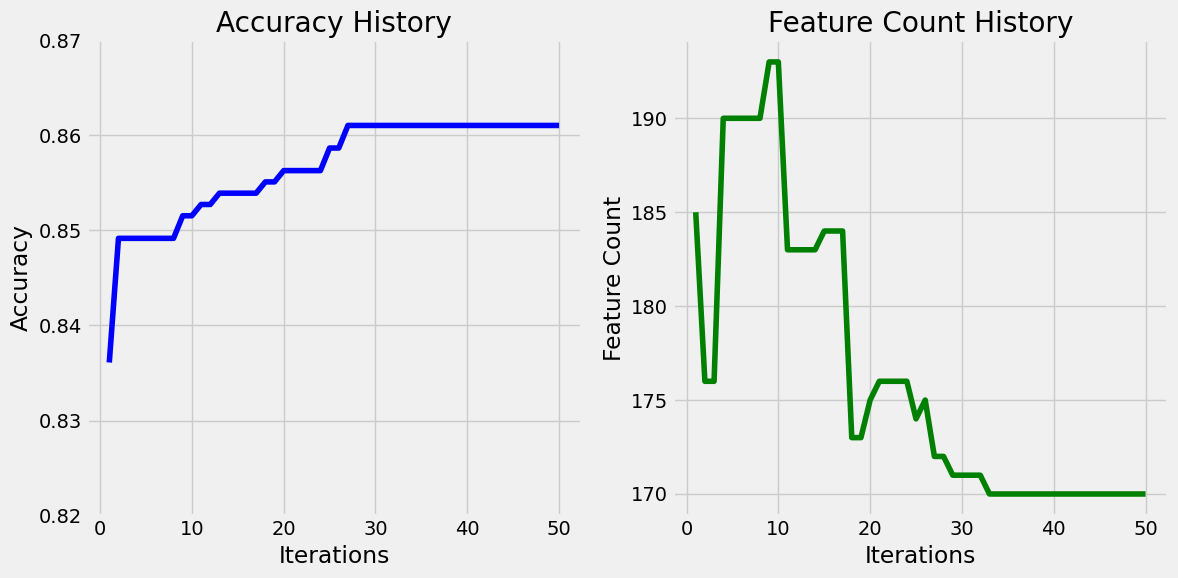

In [ ]:
plt.style.use("fivethirtyeight")

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the accuracy data on the first subplot (ax1)
ax1.plot(range(1, len(historyy) + 1), historyy, color='blue', linestyle='-')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Accuracy')
ax1.set_title('Accuracy History')
ax1.set_ylim(0.82, 0.87)  # Set the y-axis limits between 0.7 and 1.0

# Plot the feature count data on the second subplot (ax2)
ax2.plot(range(1, len(feature_history) + 1), feature_history, color='green',  linestyle='-')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Feature Count')
ax2.set_title('Feature Count History')

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Display the subplots
plt.show()

In [ ]:
import numpy as np

# FITNESS FUNCTION (SPHERE FUNCTION)
# FITNESS FUNCTION TO CALCULATE THE ACCURACY OF SELECTED FEW FEATURE BASED ON THE VECTOR X

def f(x):

  # GET THE SUBSET OF FEATURE BASED ON THE FLY VECTOR VALUES (TAKE FEATURES IF VALUE>=0.5)
  features_list = []

  for i in range(len(x)):
    if x[i]>=0.5:
      features_list.append(X.columns[i])

  X_dfo = X.copy()
  X_dfo = X_dfo.loc[:, features_list]

  y_dfo = y.copy()


  # TRAIN VAL TEST SPLIT
  X_train,X_test,y_train,y_test=train_test_split(X_dfo,y_dfo,test_size=0.2,shuffle=True,stratify=y,random_state=42)

  #########################   KNN

  from sklearn.neighbors import KNeighborsClassifier
  knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors= 22)
  knn_model.fit(X_train,y_train)

  y_pred_test_knn = knn_model.predict(X_test)

  test_acc = accuracy_score(y_test,y_pred_test_knn)

  return test_acc





delta_values = [0.1,0.01,0.001,0.0001]
historyy = []

convergence_results = np.zeros((len(delta_values), 20))

for num,delt in enumerate(delta_values):

  N = 20					# POPULATION SIZE
  D = X.shape[1]					# DIMENSIONALITY
  delta = delt			# DISTURBANCE THRESHOLD
  maxIterations = 20	# ITERATIONS ALLOWED
  lowerB = [0]*D		# LOWER BOUND (IN ALL DIMENSIONS)
  upperB = [1]*D		# UPPER BOUND (IN ALL DIMENSIONS)





  # INITIALISATION PHASE
  XX = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
  fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

  # INITIALISE FLIES WITHIN BOUNDS
  for i in range(N):
    for d in range(D):
      XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

  # MAIN DFO LOOP
  for itr in range (maxIterations):
    for i in range(N): # EVALUATION
      fitness[i] = f(XX[i,])
    s = np.argmax(fitness) # FIND BEST FLY

    #if (itr%10 == 0): # PRINT BEST FLY EVERY 10 ITERATIONS
    print ("Iteration:", itr, "\tBest fly index:", s,
          "\tFitness value (Test F1 - KNN):", fitness[s])

    convergence_results[num, itr] = fitness[s]






    # TAKE EACH FLY INDIVIDUALLY
    for i in range(N):
      if i == s: continue # ELITIST STRATEGY

      # FIND BEST NEIGHBOUR
      left = (i-1)%N
      right = (i+1)%N
      bNeighbour = right if fitness[right]>fitness[left] else left

      for d in range(D): # UPDATE EACH DIMENSION SEPARATELY
        if (np.random.rand() < delta):
          XX[i,d] = np.random.uniform(lowerB[d], upperB[d])
          continue;

        u = np.random.rand()
        XX[i,d] = XX[bNeighbour,d] + u*(XX[s,d] - XX[i,d])

        # OUT OF BOUND CONTROL
        if XX[i,d] < lowerB[d] or XX[i,d] > upperB[d]:
          XX[i,d] = np.random.uniform(lowerB[d], upperB[d])

  for i in range(N):
    fitness[i] = f(XX[i,]) # EVALUATION
  s = np.argmax(fitness) # FIND BEST FLY

  print('----------------Disturbance set to {}--------------------------'.format(delt))
  print("\nFinal best fitness:\t", fitness[s])
  print("\nBest fly position:\n",  XX[s,])
  historyy.append(fitness[s])

Iteration: 0 	Best fly index: 8 	Fitness value (Test F1 - KNN): 0.838479809976247
Iteration: 1 	Best fly index: 1 	Fitness value (Test F1 - KNN): 0.8456057007125891
Iteration: 2 	Best fly index: 1 	Fitness value (Test F1 - KNN): 0.8456057007125891
Iteration: 3 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 4 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 5 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 6 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 7 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 8 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 9 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 10 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Iteration: 11 	Best fly index: 0 	Fitness value (Test F1 - KNN): 0.8586698337292161
Ite

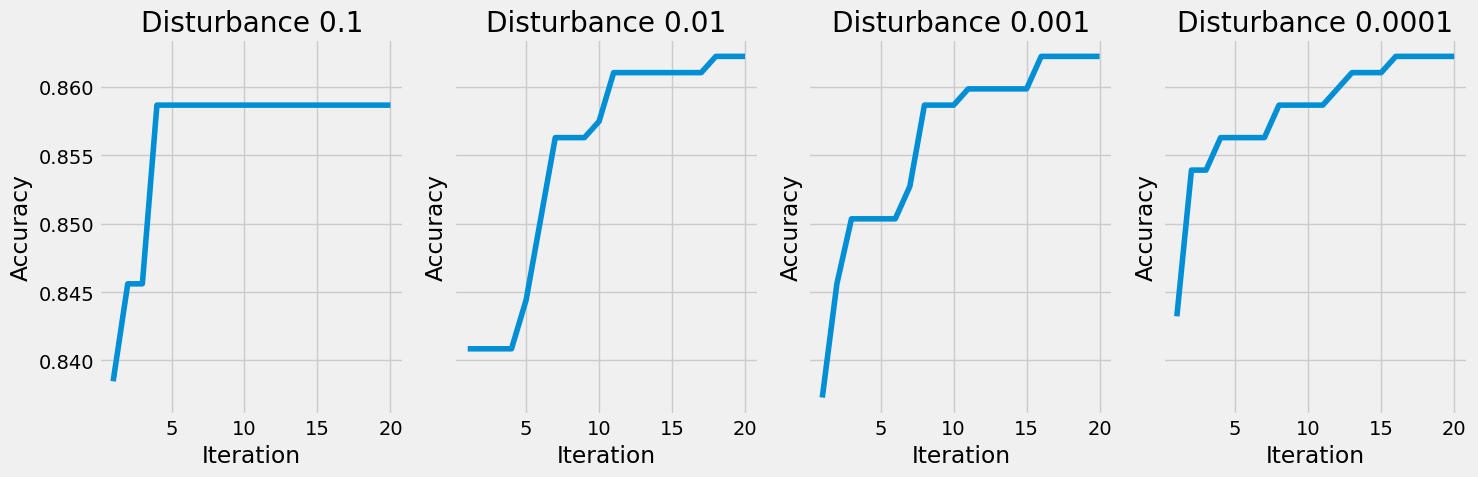

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, len(delta_values), figsize=(15, 5), sharey=True)

# Plot convergence graphs for each disturbance index separately
for k,disturbance_index in enumerate(delta_values):
    axs[k].plot(range(1, maxIterations + 1), convergence_results[k, :])
    axs[k].set_xlabel('Iteration')
    axs[k].set_ylabel('Accuracy')
    axs[k].set_title(f'Disturbance {disturbance_index}')
    axs[k].grid()

    axs[k].grid(True)


plt.setp(axs, ylabel='Accuracy')
# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [42]:
# Experiment with different populations values


# Create the bar plot
#plt.bar(range(len(pop_values)), historyy, color='darkgrey', width=0.5)  # Adjust the width as per your preference

# Customize x-axis ticks and labels
#plt.xticks(range(len(pop_values)), pop_values)

# Adding labels and title
#plt.xlabel('Population Size (N)')
#plt.ylabel('Accuracy')
#plt.title('Accuracy by Population Size')
#plt.set_ylim(0.86, 0.9)

# Display the plot
#plt.show()

# BEST FEATURES

In [43]:
indices = [index for index, element in enumerate(XX[s,]) if element >= 0.5]

df_best = df.iloc[:,indices]
X_best = X.iloc[:,indices]

In [44]:
df_best.shape

(4209, 171)

In [45]:
X_best.shape

(4209, 171)

In [46]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X_best,y,test_size=0.2,shuffle=True,stratify=y,random_state=42)

## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

train_acc_hist_knn= []
cv_acc_hist_knn = []
test_acc_hist_knn = []

for i in range (1,30):
  knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors= i)
  knn_model.fit(X_train,y_train)

  y_pred_train_knn = knn_model.predict(X_train)
  #y_pred_val_knn = knn_model.predict(X_val)
  y_pred_test_knn = knn_model.predict(X_test)


  print('------- {} Neighbors --------'.format(i))
  print('F1 on Train: ', f1_score(y_train,y_pred_train_knn,average='macro'))
  print('F1 on Test: ', f1_score(y_test,y_pred_test_knn,average='macro'))
  print('Train Acc:',accuracy_score(y_train,y_pred_train_knn))
  print('Test Acc:',accuracy_score(y_test,y_pred_test_knn))


  train_acc_hist_knn.append(accuracy_score(y_train,y_pred_train_knn))
  #cv_acc_hist_knn.append(accuracy_score(y_val,y_pred_val_knn))
  test_acc_hist_knn.append(accuracy_score(y_test,y_pred_test_knn))



------- 1 Neighbors --------
F1 on Train:  0.9000465674556846
F1 on Test:  0.779125776505403
Train Acc: 0.9005049005049005
Test Acc: 0.7802850356294537
------- 2 Neighbors --------
F1 on Train:  0.8667718066554744
F1 on Test:  0.7895365635631098
Train Acc: 0.8669438669438669
Test Acc: 0.7897862232779097
------- 3 Neighbors --------
F1 on Train:  0.8830757930814284
F1 on Test:  0.827259412914513
Train Acc: 0.8838728838728839
Test Acc: 0.828978622327791
------- 4 Neighbors --------
F1 on Train:  0.8691725126987827
F1 on Test:  0.816728855721393
Train Acc: 0.8693198693198693
Test Acc: 0.8171021377672208
------- 5 Neighbors --------
F1 on Train:  0.8738231676254723
F1 on Test:  0.8320577625557765
Train Acc: 0.874962874962875
Test Acc: 0.833729216152019
------- 6 Neighbors --------
F1 on Train:  0.8702235176679136
F1 on Test:  0.834963866921189
Train Acc: 0.8711018711018711
Test Acc: 0.836104513064133
------- 7 Neighbors --------
F1 on Train:  0.8714401100434201
F1 on Test:  0.8393312827523

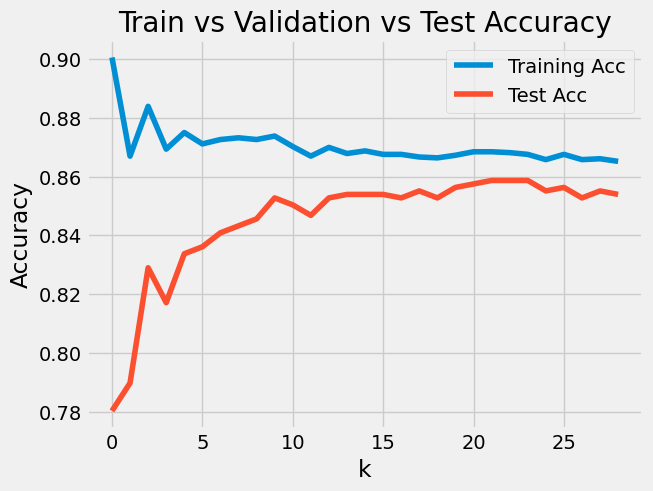

In [48]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

plt.plot(range(len(train_acc_hist_knn)),train_acc_hist_knn,label='Training Acc')
#plt.plot(range(len(cv_acc_hist_knn)),cv_acc_hist_knn,label='Validation Acc')
plt.plot(range(len(test_acc_hist_knn)),test_acc_hist_knn,label='Test Acc')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')
plt.title('Train vs Validation vs Test Accuracy')


plt.show()

In [49]:
knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors= 20)
knn_model.fit(X_train,y_train)

y_pred_train_knn = knn_model.predict(X_train)
y_pred_test_knn = knn_model.predict(X_test)

print('----------Best model----------------')
print('Acc on Train: ', accuracy_score(y_train,y_pred_train_knn))
print('Acc on Test: ', accuracy_score(y_test,y_pred_test_knn))

----------Best model----------------
Acc on Train:  0.8672408672408672
Acc on Test:  0.8562945368171021


In [50]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_test_knn,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_test_knn)
print(report)

Confusion Matrix: [[333  68]
 [ 53 388]]
---------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.85       401
           1       0.85      0.88      0.87       441

    accuracy                           0.86       842
   macro avg       0.86      0.86      0.86       842
weighted avg       0.86      0.86      0.86       842



[Text(0.5, 4.183333333333314, 'Predictions'),
 Text(21.78333333333333, 0.5, 'Actual values')]

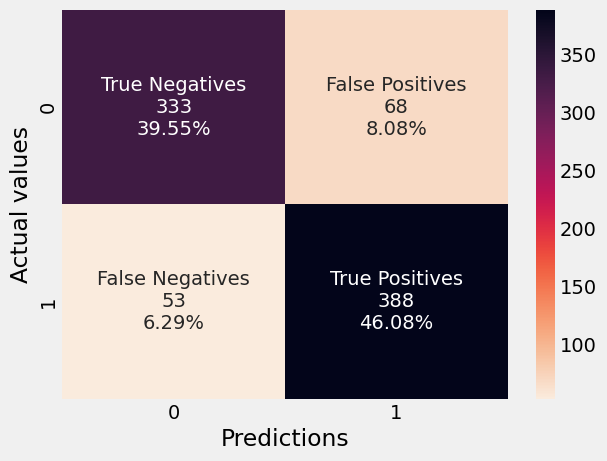

In [51]:
import seaborn as sns

group_names = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
group_counts = ["{0:0.0f}".format(value) for value in conf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in conf_mat.flatten() / np.sum(conf_mat)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(conf_mat, annot=labels, fmt='', cmap='rocket_r')
ax.set(xlabel="Predictions",ylabel="Actual values")

# Other Feature selection tech

## Rfe

In [55]:
# TRAIN VAL TEST SPLIT
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,stratify=y,random_state=42)

In [56]:
X_train.shape

(3367, 364)

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Initialize the classifier (you can use any other classifier as well)
clf = LogisticRegression()

# Specify the number of features to select (e.g., 10)
n_features_to_select = 150

# Create RFE object and fit the model
rfe = RFE(estimator=clf, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]


print(selected_features)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Index(['X13', 'X14', 'X16', 'X17', 'X21', 'X24', 'X26', 'X27', 'X29', 'X30',
       ...
       'X365', 'X366', 'X371', 'X373', 'X374', 'X376', 'X379', 'X380', 'X382',
       'X383'],
      dtype='object', length=150)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors= 22)

# Train the classifier with the selected features
knn_model.fit(X_train[selected_features], y_train)

# Make predictions on the test set
y_pred_rfe = knn_model.predict(X_test[selected_features])

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rfe)
print('----------------------------------------')
print("Accuracy after RFE with ",n_features_to_select," features:",accuracy)
print('----------------------------------------')

----------------------------------------
Accuracy after RFE with  150  features: 0.850356294536817
----------------------------------------


In [59]:
print(X_train[selected_features].shape)

(3367, 150)


In [60]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_rfe,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_rfe)
print(report)

Confusion Matrix: [[327  74]
 [ 52 389]]
---------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       401
           1       0.84      0.88      0.86       441

    accuracy                           0.85       842
   macro avg       0.85      0.85      0.85       842
weighted avg       0.85      0.85      0.85       842



## Variance thresholding

In [62]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(metric='manhattan',n_neighbors= 20)


# Specify the threshold for variance (remove features below this threshold)
threshold_value = 0.1

# Create VarianceThreshold object and fit the model
variance_selector = VarianceThreshold(threshold=threshold_value)
X_train_selected = variance_selector.fit_transform(X_train)

# Get the selected features' indices
selected_features_indices = variance_selector.get_support(indices=True)

# Filter the testing set with the selected features
X_test_selected = X_test.iloc[:, selected_features_indices]

# Train the classifier with the selected features
clf.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred_var = clf.predict(X_test_selected)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_var)
print("Accuracy:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.830166270783848


In [63]:
X_train_selected.shape

(3367, 92)

In [64]:
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report

# Confusion matrix and report

conf_mat = confusion_matrix(y_test,y_pred_var,
                            #normalize='all'
                            )
print('Confusion Matrix:',conf_mat)
print('---------------')

report = classification_report(y_test,y_pred_var)
print(report)

Confusion Matrix: [[322  79]
 [ 64 377]]
---------------
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       401
           1       0.83      0.85      0.84       441

    accuracy                           0.83       842
   macro avg       0.83      0.83      0.83       842
weighted avg       0.83      0.83      0.83       842

